In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Load raw data

In [65]:
raw_data = pd.read_csv('vehicle.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [66]:
# describe data
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [67]:
# find all and sum of data entries that have missing values
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [68]:
# drop entries with missing values
data = raw_data.dropna(axis=0) # axis=0 means rows, =1 means columns
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [69]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

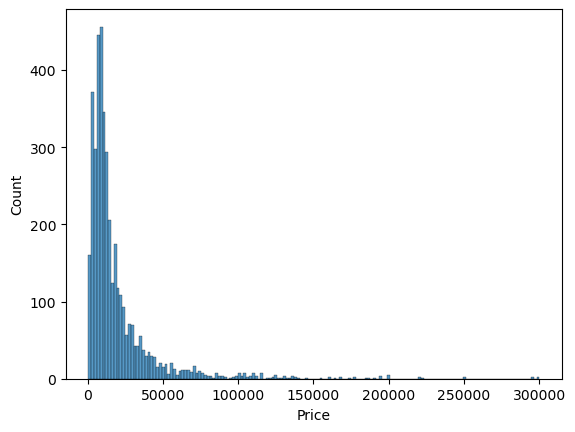

In [70]:
# spot anomalies by data visualization
sns.histplot(data['Price'])

### Deal with outliers

<Axes: xlabel='Price', ylabel='Count'>

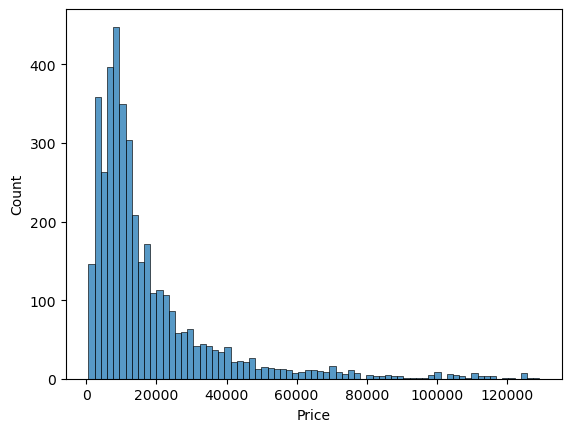

In [71]:
# make it more centralized
q = data['Price'].quantile(0.99) # gets the 0.99 percentile threshold
data_filtered = data[data['Price'] < q] # filters the original data
sns.histplot(data_filtered['Price'])

<Axes: xlabel='Mileage', ylabel='Count'>

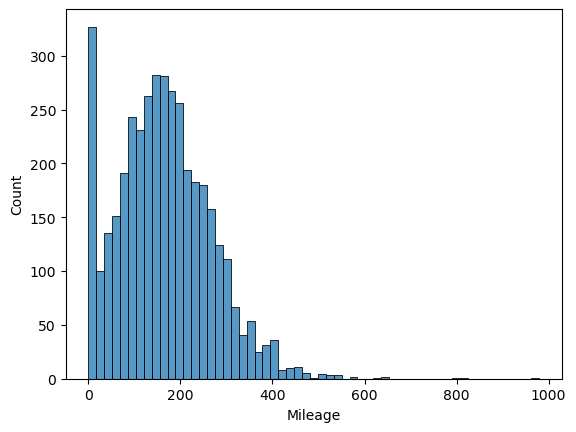

In [72]:
# now for milleage
sns.histplot(data_filtered['Mileage'])

<Axes: xlabel='Mileage', ylabel='Density'>

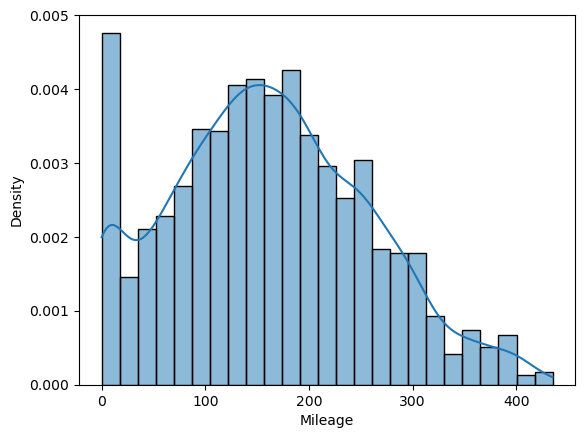

In [73]:
q = data_filtered['Mileage'].quantile(0.99)
data_1 = data_filtered[data_filtered['Mileage'] < q]
sns.histplot(data_1['Mileage'], kde=True, stat="density")

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


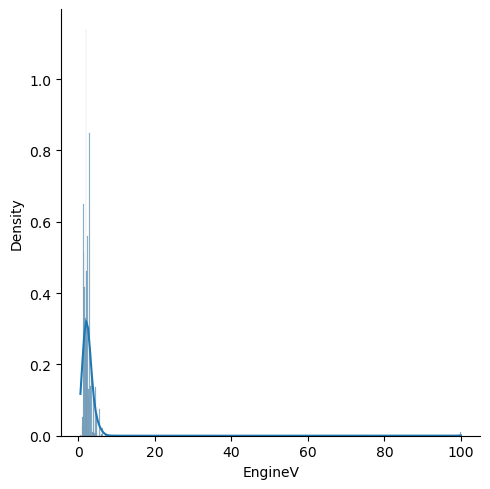

In [74]:
# for engine volume
sns.displot(data_1['EngineV'], kde=True, stat='density')

<Axes: xlabel='EngineV', ylabel='Density'>

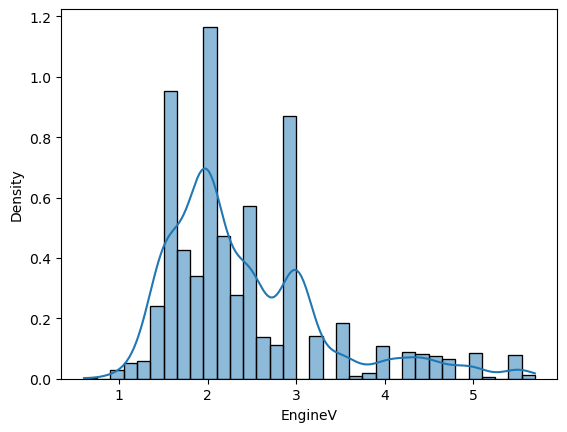

In [75]:
# remove outliers
q = data_1['EngineV'].quantile(0.99)
data_2 = data_1[data_1['EngineV'] < q]
sns.histplot(data_2['EngineV'], kde=True, stat="density")

<Axes: xlabel='Year', ylabel='Density'>

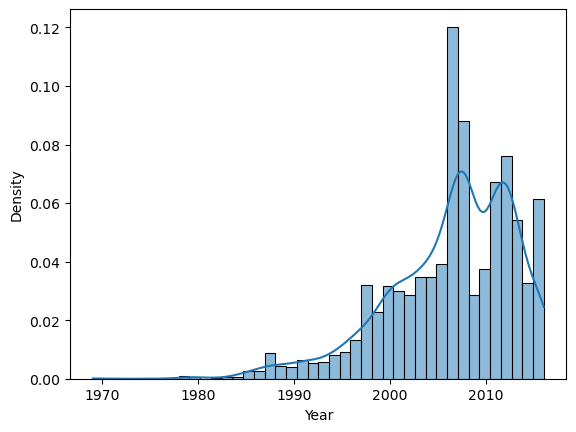

In [76]:
# now year
sns.histplot(data_2['Year'], kde=True, stat='density')

<Axes: xlabel='Year', ylabel='Density'>

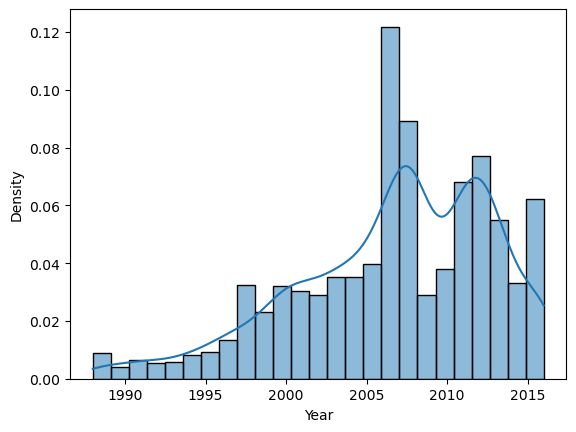

In [77]:
# keep > 0.01 percentile
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year'] > q]
sns.histplot(data_3['Year'], kde='true', stat='density')

In [78]:
# reset index, because when we remove entries, the index go with it
data_cleaned = data_3.reset_index(drop=True)

### Check for linearity

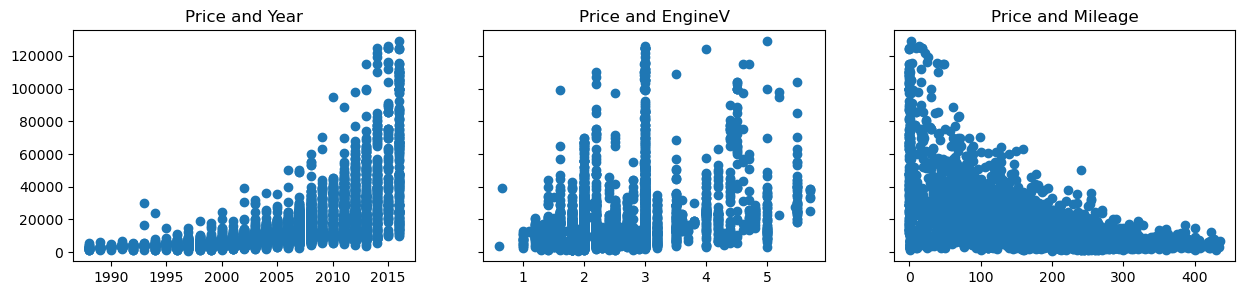

In [79]:
# Create 3 plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3)) # creates the main canvas, divided into 3 subplots
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()
# doesnt grow linearly


In [80]:
# Let's transform the price using logarithm
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


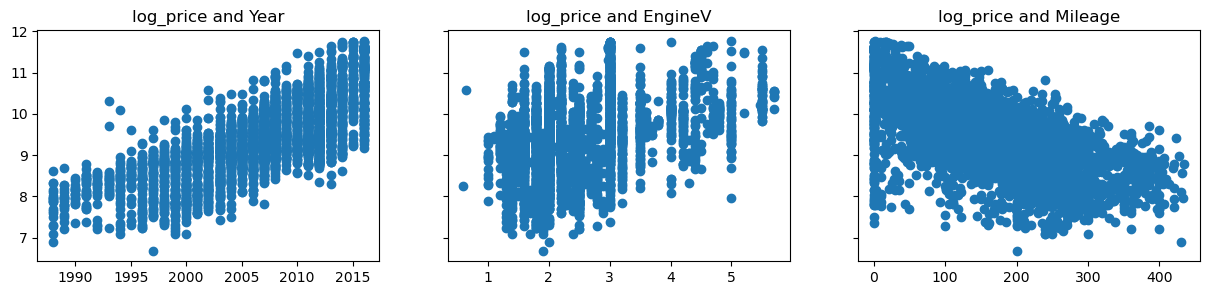

In [81]:
# check the scatter plot again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3)) # creates the main canvas, divided into 3 subplots
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

Check for multicollinearity
Linearity (done), No Endogeneity (logika sm teori aja, won't do much on this model)
From the scatter plot, it seems like the homoscedasticity is good
No autocorrelation? check

### Check for OLS assumptions

In [82]:
import statsmodels.api as sm
y = data_cleaned['log_price']
x = data_cleaned[['Year', 'EngineV', 'Mileage']]
result = sm.OLS(y,x).fit()
result.summary()
# Durbin-Watson value is near 2, suggests no auto-correlation

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.463e+05
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                        0.00
Time:                        00:36:27   Log-Likelihood:                         -3311.4
No. Observations:                3840   AIC:                                      6629.
Df Residuals:                    3837   BIC:                                      6648.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0046   1.52e-05    306.005      0.000       0.005       0.005
EngineV        0.4022      0.010     39.101      0.000       0.382       0.422
Mileage       -0.0055   9.63e-05    -56.835      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      371.010   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.726
Skew:                          -0.701   Prob(JB):                    5.90e-131
Kurtosis:                       4.334   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

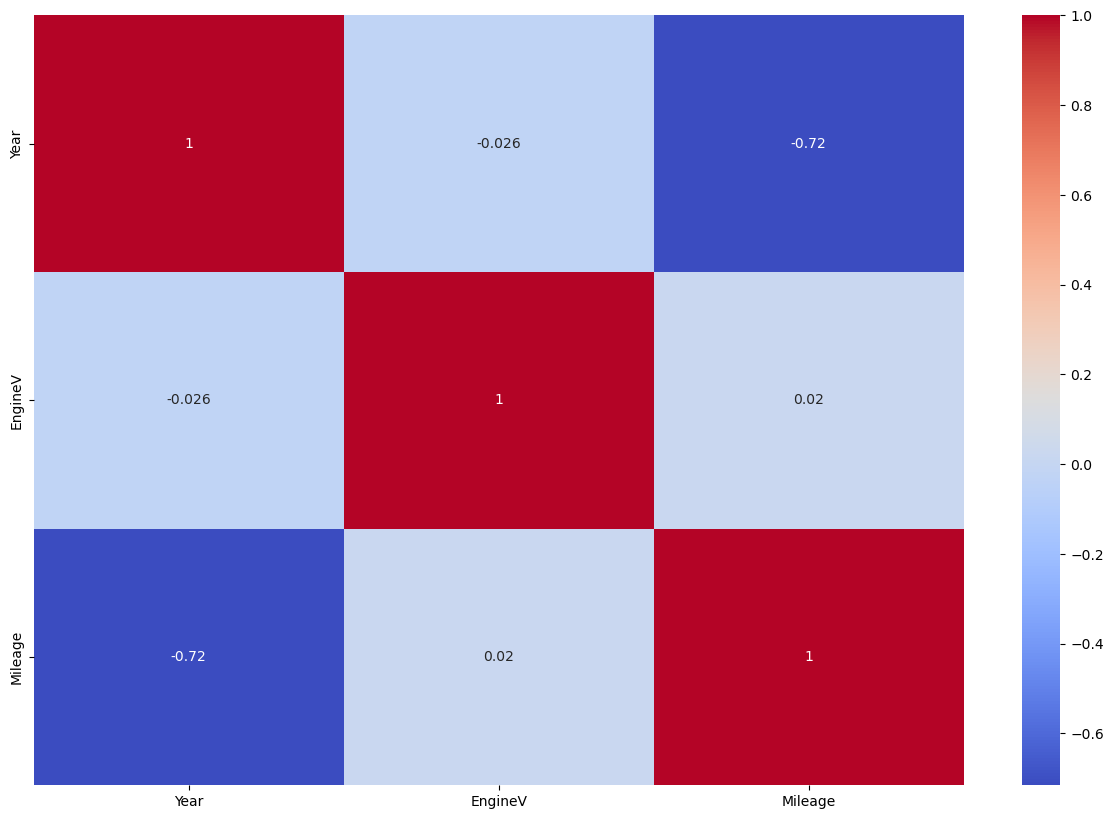

In [83]:
# Check for multicollinearity
# Check correlation matrix
# Check the VIF for every independent variable

numeric_data = data_cleaned[['Year', 'EngineV', 'Mileage']]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# numeric_data = data_cleaned[['Year', 'EngineV', 'Mileage']]: This line selects only the numerical columns ('Year', 'EngineV', 'Mileage') from your main DataFrame (data_cleaned) and puts them into a new DataFrame called numeric_data.
# correlation_matrix = numeric_data.corr(): This is the key calculation. The .corr() method computes the correlation coefficient between every pair of columns in numeric_data. The result is a new DataFrame (correlation_matrix) where each cell shows the correlation between two variables.
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'): This line uses the Seaborn library to create the heatmap visualization.
# correlation_matrix: The data being plotted.
# annot=True: This argument tells the function to write the numerical correlation value inside each square of the heatmap.
# cmap='coolwarm': This sets the color scheme. 'coolwarm' uses warm colors (like red) for positive correlations, cool colors (like blue) for negative correlations, and neutral colors for correlations near zero.

from the heat map, it shows that there is a negative correlation between year and mileage. Makes sense

should drop either one of them, but let's check the VIF first just to be more sure

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif['Features'] = numeric_data.columns
vif

,VIF,Features
0,10.823028,Year
1,8.262153,EngineV
2,3.798257,Mileage


Year shows high VIF value, better to drop it to fix the multicollinearity

In [85]:
data_no_mc = data_cleaned.drop(['Year'], axis=1)
data_no_mc.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,286,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,181,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,NaN,9.408321
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,NaN,0.873615
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,6.684612
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,NaN,8.881836
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,NaN,9.352272
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,NaN,9.975808


In [86]:
data_no_mc.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'log_price'], dtype=object)

### Dummies

In [127]:
data_with_dummies = pd.get_dummies(data_no_mc, drop_first=True)
# drops first category in each feature, to avoid perfect multicollinearity
data_with_dummies = data_with_dummies.astype(float)

In [128]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7900.0,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13300.0,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23000.0,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18300.0,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No need to check for autocorrelation. Autocorrelation only occurs on time-series data

Check multicollinearity

In [129]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 

In [130]:
data_mc_check = data_with_dummies.drop(['log_price'], axis=1)
data_mc_check = data_mc_check.drop(['Price'], axis=1)
data_mc_check.head()


,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(data_mc_check.values, i) for i in range (data_mc_check.shape[1])]
vif['Features'] = data_mc_check.columns
vif

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,1.888214,Mileage
1,7.083246,EngineV
2,648.027527,Brand_BMW
3,1157.755001,Brand_Mercedes-Benz
4,inf,Brand_Mitsubishi
5,inf,Brand_Renault
6,inf,Brand_Toyota
7,inf,Brand_Volkswagen
8,7.144718,Body_hatch
9,5.939169,Body_other


too many different models. Not good for the model as it becomes overly complicated

In [132]:
# keep only the top 10 model
# get the top 10 models
model_counts = data_no_mc['Model'].value_counts()
print(model_counts)

Model
E-Class                181
Vito                   154
A6                     153
Kangoo                 132
Camry                  127
Caddy                  110
X5                     110
Megane                  85
Land Cruiser Prado      75
520                     74
Trafic                  70
Touareg                 65
Passat B6               61
Polo                    59
320                     56
Q7                      56
T5 (Transporter)        55
Passat B5               54
A4                      54
C-Class                 52
525                     51
Rav 4                   50
Lancer X                49
Lancer                  49
530                     49
Passat B7               48
Pajero Wagon            48
Corolla                 46
S 500                   38
Jetta                   38
T4 (Transporter)        37
X6                      37
T5 (Transporter)        35
Land Cruiser 200        34
Avensis                 29
Auris                   28
318                   

In [133]:
# keep the top 10
top_10_models = model_counts.nlargest(10).index
print(top_10_models)

Index(['E-Class', 'Vito', 'A6', 'Kangoo', 'Camry', 'Caddy', 'X5', 'Megane',
       'Land Cruiser Prado', '520'],
      dtype='object', name='Model')


In [134]:
# group the less frequent into 'Other'
data_cleaned['Model Simplified'] = np.where(data_no_mc['Model'].isin(top_10_models), data_cleaned['Model'], 'Other') 
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price', 'Model Simplified'],
      dtype=object)

In [135]:
# drop the old model
data_cleaned_1 = data_cleaned.drop('Model', axis=1)
data_cleaned_1.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price', 'Model Simplified'],
      dtype=object)

In [96]:
data_cleaned_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price,Model Simplified
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840,Other
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618,Other
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519,Other
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249,Other
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656,Other


In [137]:
# recreate dummies
data_with_dummies_2 = pd.get_dummies(data_cleaned_1, drop_first=True)
# drops first category in each feature, to avoid perfect multicollinearity
data_with_dummies_2 = data_with_dummies_2.astype(float)
data_with_dummies_2.head()

,Price,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Model Simplified_A6,Model Simplified_Caddy,Model Simplified_Camry,Model Simplified_E-Class,Model Simplified_Kangoo,Model Simplified_Land Cruiser Prado,Model Simplified_Megane,Model Simplified_Other,Model Simplified_Vito,Model Simplified_X5
0,4200.0,277.0,2.0,1991.0,8.342840,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7900.0,427.0,2.9,1999.0,8.974618,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13300.0,358.0,5.0,2003.0,9.495519,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23000.0,240.0,4.2,2007.0,10.043249,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18300.0,120.0,2.0,2011.0,9.814656,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [138]:
# put target data in y, and inputs in x
inputs = data_with_dummies_2.drop(['log_price', 'Price'], axis=1)
targets = data_with_dummies_2['log_price']
targets


0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
5        9.560997
6        9.287209
7        7.244228
8        9.388487
9        7.824046
10       9.159047
11       9.259131
12       9.680344
13       9.059517
14       8.003029
15      10.184900
16       8.160518
17      10.551454
18       8.922658
19       8.824678
20       9.259131
21      10.122623
22       9.942708
23       8.779557
24       9.515322
25       9.047821
26       7.972466
27       9.975808
28       9.792556
29      10.257659
30       9.190138
31       9.581904
32       8.699515
33      11.119883
34      10.431170
35       9.190138
36      11.050890
37       8.948976
38       9.169518
39       9.457200
40      10.621327
41       8.216088
42      10.292146
43       8.779557
44       9.017968
45       9.878170
46       9.510445
47       9.126959
48       8.517193
49      10.081634
50      10.515967
51       9.093807
52       8.961879
53       7.408531
54      10.819778
55       9

### Linear regression model

#### Scale the data

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
# Scale the inputs
inputs_scaled = scaler.transform(inputs)

Split the data (training, testing)

In [140]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3072, 28)
(768, 28)
(3072,)
(768,)


In [142]:
X_train

array([[ 0.32528663,  0.63986439,  0.0485767 , ...,  0.6746085 ,
        -0.20440085, -0.17172832],
       [ 1.03561424, -0.24931454, -1.0958068 , ..., -1.48234124,
         4.89234759, -0.17172832],
       [ 0.91026231, -0.47160927, -1.25929016, ...,  0.6746085 ,
        -0.20440085, -0.17172832],
       ...,
       [ 0.30439464, -0.24931454, -1.25929016, ..., -1.48234124,
         4.89234759, -0.17172832],
       [ 0.40885458, -1.13849347,  0.0485767 , ...,  0.6746085 ,
        -0.20440085, -0.17172832],
       [-1.49231638,  0.08412756,  1.02947683, ..., -1.48234124,
        -0.20440085, -0.17172832]])

In [143]:
Y_train

1729    10.203592
2422     8.853665
433      7.972466
2603     9.350015
371     10.621327
3150     9.230143
2299     7.600902
1047     8.895630
700      9.836279
3340    11.225243
644      7.706163
2028     9.947504
2526     8.411833
3793    10.273325
2428     9.846917
3614    10.835652
1370    10.085767
3447     9.259131
246      8.665613
889     10.809728
734      8.779557
505      9.038365
1672     8.699515
2269     9.785661
3077     9.190138
3307     7.919356
2268    10.064756
976      9.323669
108      9.093807
1721     9.159047
985     10.071541
2316     9.648595
2861    10.021271
3603    10.915088
543     10.184900
3468    10.085767
3422     9.453287
2493    11.127263
259      8.839277
810      9.169518
3036     9.200290
3506     9.786954
612     11.088174
1220     9.059401
2170     8.612503
999      8.824678
485      8.987072
2547    10.021271
3381     8.914626
2148     9.375855
258      8.935904
386      9.615805
2474     9.368011
1309    10.085809
3138     9.296518
2648    10

In [144]:
# create linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [145]:
# test prediction accurracy
yhat = reg.predict(X_train)

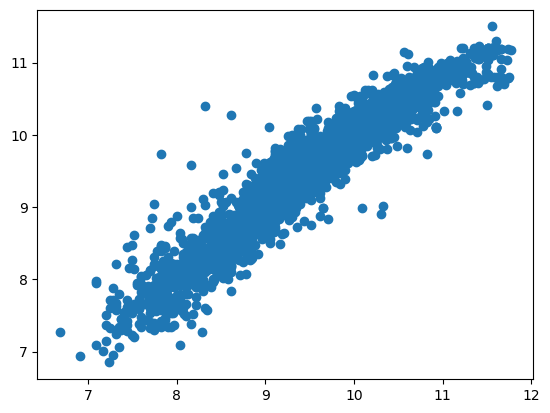

In [146]:
# visualize scatter plot
plt.scatter(Y_train, yhat)


In [147]:
Y_train

1729    10.203592
2422     8.853665
433      7.972466
2603     9.350015
371     10.621327
3150     9.230143
2299     7.600902
1047     8.895630
700      9.836279
3340    11.225243
644      7.706163
2028     9.947504
2526     8.411833
3793    10.273325
2428     9.846917
3614    10.835652
1370    10.085767
3447     9.259131
246      8.665613
889     10.809728
734      8.779557
505      9.038365
1672     8.699515
2269     9.785661
3077     9.190138
3307     7.919356
2268    10.064756
976      9.323669
108      9.093807
1721     9.159047
985     10.071541
2316     9.648595
2861    10.021271
3603    10.915088
543     10.184900
3468    10.085767
3422     9.453287
2493    11.127263
259      8.839277
810      9.169518
3036     9.200290
3506     9.786954
612     11.088174
1220     9.059401
2170     8.612503
999      8.824678
485      8.987072
2547    10.021271
3381     8.914626
2148     9.375855
258      8.935904
386      9.615805
2474     9.368011
1309    10.085809
3138     9.296518
2648    10

In [148]:
yhat

array([ 9.70916382,  8.68249537,  8.03701588, ...,  8.6842326 ,
        8.63085871, 10.1119334 ])

In [ ]:
# check regression score
reg.score(X_train, Y_train)

0.9011941642071014

In [150]:
# check from stat models
y = Y_train
x = X_train
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     991.2
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        01:28:50   Log-Likelihood:                -404.53
No. Observations:                3072   AIC:                             867.1
Df Residuals:                    3043   BIC:                             1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4107      0.005   1878.490      0.000       9.401       9.421
x1            -0.1155      0.008    -14.700      0.000      -0.131      -0.100
x2             0.2058      0.007     30.842      0.000       0.193       0.219
x3             0.5059      0.008     63.419      0.000       0.490       0.522
x4             0.0136      0.009      1.490      0.136      -0.004       0.031
x5             0.0212      0.010      2.155      0.031       0.002       0.041
x6            -0.1437      0.007    -19.858      0.000      -0.158      -0.130
x7            -0.2226      0.009    -23.779      0.000      -0.241      -0.204
x8            -0.0897      0.009     -9.904      0.000      -0.107      -0.072
x9            -0.1184      0.010    -12.271      0.000      -0.137      -0.099
x10           -0.0923      0.006    -14.212      0.000      -0.105      -0.080
x11           -0.0518      0.006     -8.131      0.000      -0.064      -0.039
x12           -0.1395      0.009    -16.136      0.000      -0.156      -0.123
x13           -0.0976      0.007    -13.870      0.000      -0.111      -0.084
x14           -0.0739      0.009     -8.667      0.000      -0.091      -0.057
x15           -0.0491      0.006     -7.959      0.000      -0.061      -0.037
x16           -0.0107      0.005     -1.968      0.049      -0.021   -3.67e-05
x17           -0.0739      0.007    -11.351      0.000      -0.087      -0.061
x18            0.2574      0.006     46.195      0.000       0.246       0.268
x19           -0.0398      0.010     -3.912      0.000      -0.060      -0.020
x20           -0.1087      0.009    -12.395      0.000      -0.126      -0.091
x21           -0.0283      0.009     -2.988      0.003      -0.047      -0.010
x22           -0.0486      0.011     -4.624      0.000      -0.069      -0.028
x23           -0.0917      0.010     -9.437      0.000      -0.111      -0.073
x24           -0.0048      0.008     -0.599      0.549      -0.021       0.011
x25           -0.0017      0.008     -0.204      0.838      -0.018       0.015
x26           -0.0684      0.019     -3.640      0.000      -0.105      -0.032
x27           -0.1278      0.010    -12.663      0.000      -0.148      -0.108
x28           -0.0340      0.008     -4.039      0.000      -0.051      -0.018
==============================================================================
Omnibus:                      315.502   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1847.244
Skew:                          -0.298   Prob(JB):                         0.00
Kurtosis:                       6.752   Cond. No.                         9.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

VERY GOOD SCORE

In [ ]:
# test model
yhat_test = reg.predict(X_test)


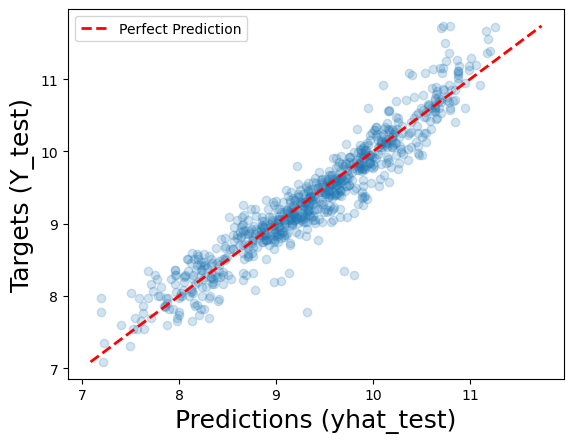

In [158]:
# visualize scatterplot
plt.scatter(yhat_test, Y_test, alpha=0.2)
plt.xlabel('Predictions (yhat_test)', size=18)
plt.ylabel('Targets (Y_test)', size=18)

# Find the limits of your plot
min_val = min(yhat_test.min(), Y_test.min())
max_val = max(yhat_test.max(), Y_test.max())

# Add the diagonal line (y=x)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
# ---------------------------------------------

plt.legend()
plt.show()
